In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\DS Course\Data Cleaning\\Day19\\iris - Outliers.csv")

In [57]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,28.6,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


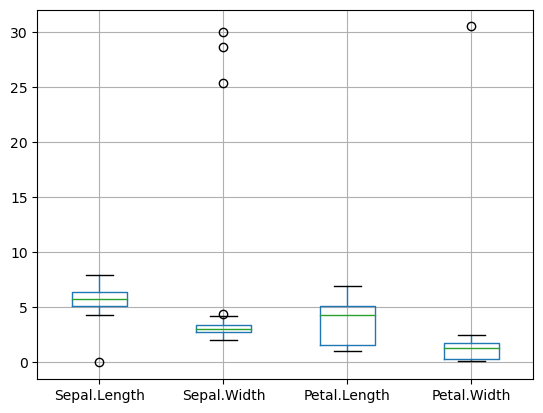

In [58]:
df.iloc[:,:4].boxplot() #create a boxplot of the first four columns of a dataframe df.
plt.show()

In [59]:
Q1=df.quantile(0.25,numeric_only=True)
Q1

#calculate the first quartile (25th percentile) and third quartile (75th percentile) of each column in a dataframe df.

Sepal.Length    5.1
Sepal.Width     2.8
Petal.Length    1.6
Petal.Width     0.3
Name: 0.25, dtype: float64

In [60]:
Q3=df.quantile(0.75,numeric_only=True)
Q3

Sepal.Length    6.4
Sepal.Width     3.4
Petal.Length    5.1
Petal.Width     1.8
Name: 0.75, dtype: float64

In [61]:
IQR=Q3-Q1

In [62]:
IQR

Sepal.Length    1.3
Sepal.Width     0.6
Petal.Length    3.5
Petal.Width     1.5
dtype: float64

In [63]:
LL = Q1- 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [64]:
LL      # Lower Limit(Lower Bound)

Sepal.Length    3.15
Sepal.Width     1.90
Petal.Length   -3.65
Petal.Width    -1.95
dtype: float64

In [65]:
UL   #Upper Bound

Sepal.Length     8.35
Sepal.Width      4.30
Petal.Length    10.35
Petal.Width      4.05
dtype: float64

In [66]:
dfn=df.iloc[:,:4]
dfn.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,28.6,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,28.6,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,30.0,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [68]:
'''
create a boolean mask that selects rows from a dataframe dfn
where any value in the row is less than a lower limit LL or greater than an upper limit UL.
'''

(dfn<LL)| (dfn>UL)                  


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,True,False,False
147,False,False,False,False
148,False,False,False,False


In [69]:
out_rows=((dfn<LL)| (dfn>UL)).any(axis=1) 

In [77]:
df_outfree = df[~out_rows] 
#create a new dataframe df_outfree that contains only the rows of a dataframe df that do not have any outliers

In [78]:
df_outfree.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
